In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [3]:
memory_usage = data.memory_usage(deep=True) / 1024 ** 2
memory_usage.head(7)

Index    0.000122
id       1.907349
f0       1.907349
f1       1.907349
f2       1.907349
f3       1.907349
f4       1.907349
dtype: float64

In [4]:
memory_usage.sum()

194.5496826171875

In [5]:
def reduce_memory_usage(df, verbose=True):
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float16).max
                ):
                    df[col] = df[col].astype(np.float16)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        print(
            "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
                end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return df

reduced_df = reduce_memory_usage(data, verbose=True)

Mem. usage decreased to 50.78 Mb (73.9% reduction)


In [6]:
reduced_df.describe()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.0000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,124999.500000,NaN,51.378476,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,6.813920
std,72168.927986,0.000000,42.396636,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.940179
min,0.000000,-0.069275,-17.000000,-7.894531,-1.475586,-7588.000,-3.291016,-40.968750,-4.144531,-502.750000,...,-12696.0000,-4.058594,0.057800,-1.999023,-24.687500,-1.131836,0.005249,-0.646973,-0.842285,0.000000
25%,62499.750000,0.251221,18.000000,-0.611328,-0.719238,163.875,4.109375,27.890625,-0.026245,-17.390625,...,73.1875,11.523438,1.471680,-0.408936,-4.003906,1.906250,0.359619,1.215820,3.732422,1.000000
50%,124999.500000,0.515137,41.000000,0.253906,0.004099,943.000,7.472656,91.000000,0.619629,8.714844,...,1060.0000,20.000000,1.661133,0.215698,0.759766,2.339844,0.531250,1.451172,7.183594,4.000000
75%,187499.250000,0.777344,75.000000,0.759277,0.765625,4116.000,11.031250,240.875000,0.934082,55.406250,...,5572.0000,32.281250,2.320312,0.502930,6.203125,2.910156,0.709961,1.901367,11.000000,10.000000
max,249999.000000,1.072266,273.000000,9.765625,1.680664,37856.000,35.062500,947.000000,4.011719,466.000000,...,54336.0000,79.937500,5.402344,1.944336,42.875000,5.574219,1.105469,4.492188,34.031250,42.000000


Let's sample the data to ease the computation. We'll take only 20% of the data and start working with that

In [7]:
sample_df = reduced_df.sample(int(len(reduced_df) * 0.2))
sample_df.shape

sample_df = sample_df.drop(['id'], axis=1)

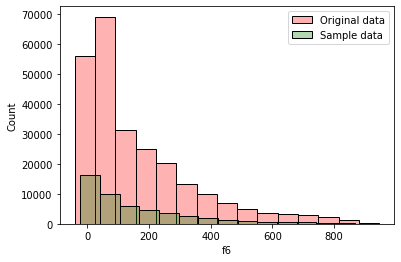

In [8]:
# Let's confirm if the sampling is retaining the feature distributions

fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(
    data=reduced_df, x="f6", label="Original data", color="red", alpha=0.3, bins=15
)
sns.histplot(
    data=sample_df, x="f6", label="Sample data", color="green", alpha=0.3, bins=15
)

plt.legend()
plt.show();

<ipython-input-9-d7b611683e69>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


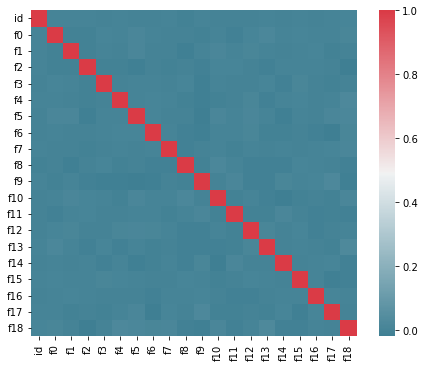

In [9]:
f, ax = plt.subplots(figsize=(8, 6))
corr = reduced_df.iloc[:,:20].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

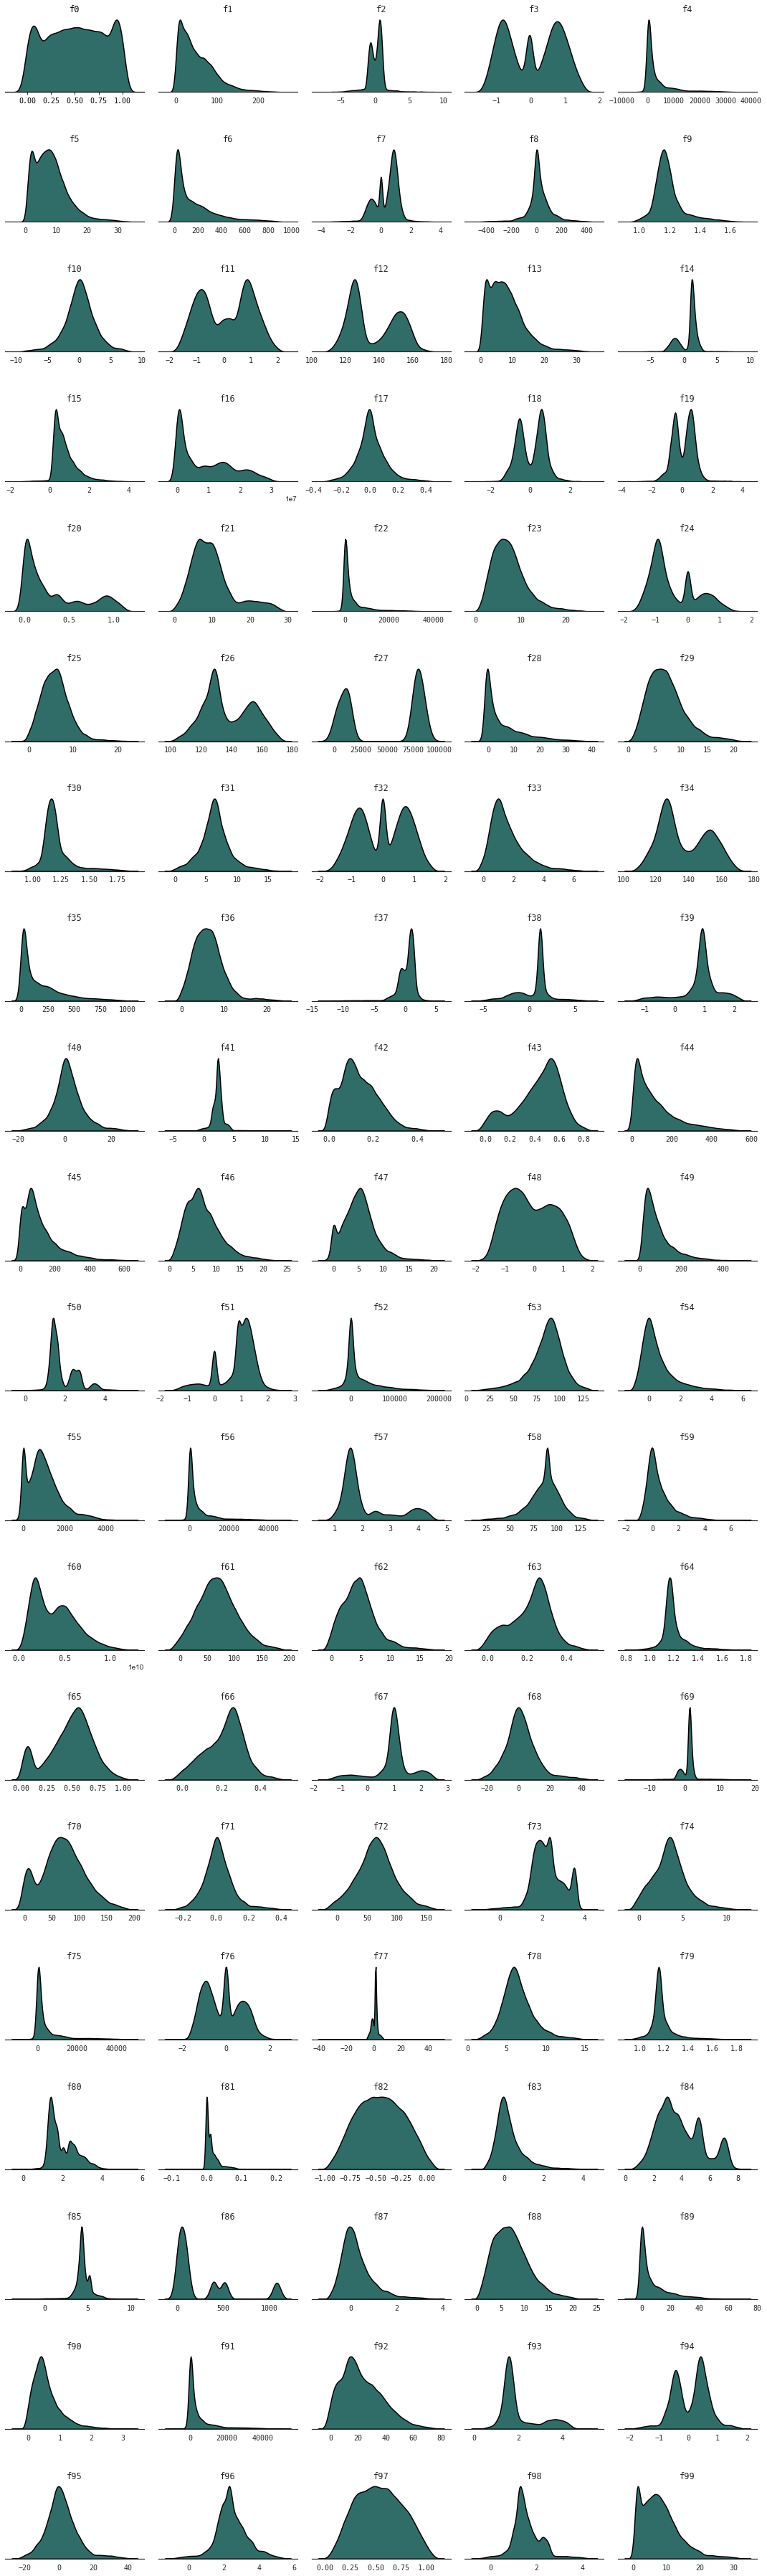

In [10]:
fig = plt.figure(figsize = (15, 50))
for i in range(len(sample_df.columns.tolist()[:100])):
    plt.subplot(20,5,i+1)
    sns.set_style("white")
    plt.title(sample_df.columns.tolist()[:100][i], size = 12, fontname = 'monospace')
    a = sns.kdeplot(sample_df[sample_df.columns.tolist()[:100][i]], color = '#1a5d57', shade = True, alpha = 0.9, linewidth = 1.5, edgecolor = 'black')
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks(fontname = 'monospace')
    plt.yticks([])
    for j in ['right', 'left', 'top']:
        a.spines[j].set_visible(False)
        a.spines['bottom'].set_linewidth(1.2)
        
fig.tight_layout(h_pad = 3)

plt.show()

In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

all_columns = "+".join(sample_df.columns[:-1])
my_formula = "loss~" + all_columns

mod = ols(formula=my_formula,
                data=sample_df, family=sm.families.Gaussian()).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

/Users/harshjhunjhunwala/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


                sum_sq       df          F        PR(>F)
f0        2.162832e+02      1.0   3.491303  6.169785e-02
f1        4.941449e+02      1.0   7.976625  4.740398e-03
f2        2.066268e+01      1.0   0.333543  5.635830e-01
f3        2.066313e+03      1.0  33.354999  7.723466e-09
f4        3.757414e+02      1.0   6.065323  1.378950e-02
...                ...      ...        ...           ...
f96       1.222662e+03      1.0  19.736548  8.907604e-06
f97       1.547312e+00      1.0   0.024977  8.744247e-01
f98       2.226675e+02      1.0   3.594362  5.798167e-02
f99       2.908405e-01      1.0   0.004695  9.453729e-01
Residual  3.091199e+06  49899.0        NaN           NaN

[101 rows x 4 columns]


In [28]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn import metrics

x = sample_df.drop(['loss'], axis=1)
y = sample_df.loss

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.33, random_state=42)

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
       'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30',
       'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40',
       'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50',
       'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60',
       'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70',
       'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80',
       'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90',
       'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99'],
      dtype='object')

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_train)

In [41]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb

xgb_model = xgb.XGBRegressor(max_depth=7,
                       n_estimators=2500,
                       learning_rate=0.008,
                       subsample=0.84,
                       booster= 'gbtree',
                       tree_method= 'gpu_hist',
                       colsample_bytree= 0.70,
                       reg_lambda= 5,
                       reg_alpha= 32,
                       n_jobs= 4,  
                       alpha=0.5,
                       random_state=123)                                  
    
xgb_model.fit(x_scaled, y_train)
oof_pred1 = xgb_model.predict(x_test)
oof_pred1 = np.clip(oof_pred1, y.min(), y.max())

print(f'Mean Error: {np.sqrt(mean_squared_error(y_test, oof_pred1))}')

XGBoostError: [23:06:49] /Users/travis/build/dmlc/xgboost/src/gbm/../common/common.h:157: XGBoost version not compiled with GPU support.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000011c82bde4 dmlc::LogMessageFatal::~LogMessageFatal() + 116
  [bt] (1) 2   libxgboost.dylib                    0x000000011c8c3742 xgboost::gbm::GBTree::ConfigureUpdaters() + 514
  [bt] (2) 3   libxgboost.dylib                    0x000000011c8c31a5 xgboost::gbm::GBTree::Configure(std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > >, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > > > > const&) + 1141
  [bt] (3) 4   libxgboost.dylib                    0x000000011c8dd64b xgboost::LearnerConfiguration::Configure() + 1499
  [bt] (4) 5   libxgboost.dylib                    0x000000011c8dda88 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 120
  [bt] (5) 6   libxgboost.dylib                    0x000000011c822a49 XGBoosterUpdateOneIter + 137
  [bt] (6) 7   libffi.7.dylib                      0x00000001053bbead ffi_call_unix64 + 85
  [bt] (7) 8   ???                                 0x00007ffeeb478a60 0x0 + 140732845754976



In [47]:
params = {
    'num_leaves': [28, 31, 50, 75],
    'learning_rate': [0.003],
    'max_depth': [-1, 3, 5],
    'n_estimators': [500, 1000],
}

lgb_estimator = lgb.LGBMRegressor(random_state=42)

grid = GridSearchCV(lgb_estimator, param_grid=params, scoring='neg_root_mean_squared_error', cv=5, verbose=100)
lgb_model = grid.fit(x_train, y_train)

print(lgb_model.best_params_, lgb_model.best_score_)


# model = lgb.LGBMRegressor(learning_rate=0.009,n_estimators=1000, num_leaves=150,random_state=42)

# model.fit(x_scaled, y_train, verbose=50)
# oof_pred1 = model.predict(x_test)
# oof_pred1 = np.clip(oof_pred1, y.min(), y.max())

# print(f'Mean Error: {np.sqrt(mean_squared_error(y_test, oof_pred1))}')


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START learning_rate=0.003, max_depth=-1, n_estimators=500, num_leaves=28
[CV 1/5; 1/24] END learning_rate=0.003, max_depth=-1, n_estimators=500, num_leaves=28;, score=-7.804 total time=   7.8s
[CV 2/5; 1/24] START learning_rate=0.003, max_depth=-1, n_estimators=500, num_leaves=28
[CV 2/5; 1/24] END learning_rate=0.003, max_depth=-1, n_estimators=500, num_leaves=28;, score=-8.012 total time=   7.4s
[CV 3/5; 1/24] START learning_rate=0.003, max_depth=-1, n_estimators=500, num_leaves=28
[CV 3/5; 1/24] END learning_rate=0.003, max_depth=-1, n_estimators=500, num_leaves=28;, score=-7.800 total time=   7.4s
[CV 4/5; 1/24] START learning_rate=0.003, max_depth=-1, n_estimators=500, num_leaves=28
[CV 4/5; 1/24] END learning_rate=0.003, max_depth=-1, n_estimators=500, num_leaves=28;, score=-7.945 total time=   7.5s
[CV 5/5; 1/24] START learning_rate=0.003, max_depth=-1, n_estimators=500, num_leaves=28
[CV 5/5; 1/24] END

KeyboardInterrupt: 

Train Acc 0.6444744757052694
Test Acc 0.011384267730813913
Plot Importance AxesSubplot(0.125,0.125;0.775x0.755)
Plot Metrics AxesSubplot(0.125,0.125;0.775x0.755)


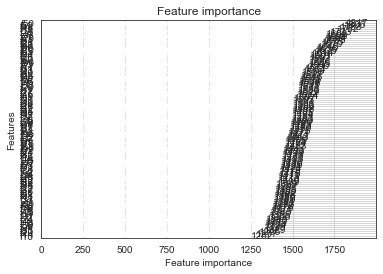

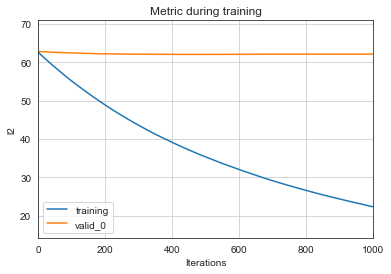

In [55]:
print('Train Acc',model.score(x_train,y_train))
print('Test Acc', model.score(x_test,y_test))
print('Plot Importance', lgb.plot_importance(model))
print('Plot Metrics', lgb.plot_metric(model))


In [44]:
# lgb.plot_tree(model,figsize=(30,40))

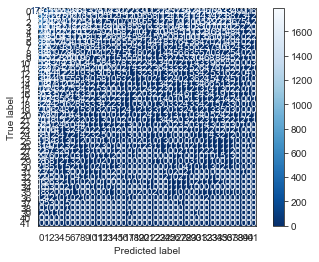

In [45]:
metrics.plot_confusion_matrix(model,x_test,y_test,cmap='Blues_r')

In [57]:
# print(metrics.classification_report(y_test,model.predict(x_test)))

In [29]:
# Grid Search

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

params = {
    'num_leaves': [7, 14, 21, 28, 31, 50, 75],
    'learning_rate': [0.003],
    'max_depth': [-1, 3, 5],
    'n_estimators': [500, 1000],
}

lgb_estimator = lgb.LGBMRegressor(boosting_type='gbdt', random_state=42)

grid = GridSearchCV(lgb_estimator, param_grid=params, scoring='accuracy', cv=5, verbose=100)
lgb_model = grid.fit(x_train, y_train)

print(lgb_model.best_params_, lgb_model.best_score_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5; 1/42] START learning_rate=0.003, max_depth=-1, n_estimators=500, num_leaves=7


/Users/harshjhunjhunwala/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/harshjhunjhunwala/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/harshjhunjhunwala/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/harshjhunjhunwala/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/harshjhunjhunwala/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/harshjhunjhunwal

[CV 1/5; 1/42] END learning_rate=0.003, max_depth=-1, n_estimators=500, num_leaves=7;, score=nan total time=   4.8s
[CV 2/5; 1/42] START learning_rate=0.003, max_depth=-1, n_estimators=500, num_leaves=7


/Users/harshjhunjhunwala/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/harshjhunjhunwala/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/harshjhunjhunwala/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/harshjhunjhunwala/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/harshjhunjhunwala/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/harshjhunjhunwal

[CV 2/5; 1/42] END learning_rate=0.003, max_depth=-1, n_estimators=500, num_leaves=7;, score=nan total time=   5.0s
[CV 3/5; 1/42] START learning_rate=0.003, max_depth=-1, n_estimators=500, num_leaves=7


/Users/harshjhunjhunwala/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/harshjhunjhunwala/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/harshjhunjhunwala/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/harshjhunjhunwala/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/harshjhunjhunwala/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/harshjhunjhunwal

[CV 3/5; 1/42] END learning_rate=0.003, max_depth=-1, n_estimators=500, num_leaves=7;, score=nan total time=   4.1s
[CV 4/5; 1/42] START learning_rate=0.003, max_depth=-1, n_estimators=500, num_leaves=7


/Users/harshjhunjhunwala/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/harshjhunjhunwala/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/harshjhunjhunwala/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/Users/harshjhunjhunwala/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/Users/harshjhunjhunwala/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/harshjhunjhunwal

[CV 4/5; 1/42] END learning_rate=0.003, max_depth=-1, n_estimators=500, num_leaves=7;, score=nan total time=   5.7s
[CV 5/5; 1/42] START learning_rate=0.003, max_depth=-1, n_estimators=500, num_leaves=7


KeyboardInterrupt: 

In [ ]:
# reg = lgb.LGBMRegressor(random_state=42)

In [56]:
lr = 0.2
for w in range(1):
    # ----------------------------------------------
    params_loss_1 = {
                    'n_estimators': 20000,
                    'learning_rate': 0.005,
                    'min_child_samples': 167,
                    'feature_fraction': 0.3513017494226757,
                    'bagging_fraction': 0.7786913835450154,
                    'bagging_freq': 4,
                    'num_leaves': 178, 
                    }

    lgbm_reg_1 = lgb.LGBMRegressor(
                                **params_loss_1, 
                                objective='rmse',
                                metric='rmse',
                                n_jobs=-1
                                )
    
    lgbm_reg_1.fit(
                x_test,
                y_test)

    p_m = lgbm_reg_1.predict(x_train)

    new_y = y_train['loss'].values - p_m
    # ----------------------------------------------
    
    params_loss_2 = {
                    'n_estimators': 10000,
                    'learning_rate': 0.001,
                    'min_child_samples': 295,
                    'feature_fraction': 0.2915087392510538,
                    'bagging_fraction': 0.8549961258824171,
                    'bagging_freq': 0,
                    'num_leaves': 105, 
                    }

    lgbm_reg_2 = lgb.LGBMRegressor(
                                **params_loss_2, 
                                objective='rmse',
                                metric='rmse',
                                n_jobs=-1
                                )
    
    lgbm_reg_2.fit(
                x_test, 
                y_test, 
                )

    p_a = lgbm_reg_2.predict(x_test)

    my_y = y_train + (p_a * lr)
    # ----------------------------------------------
    
final_loss = my_y

NameError: name 'submission_ex' is not defined

In [ ]:
# GBM